# **Cheatsheet for working on the _findmycells_ project**

## A - GitHub workflows & terminal commands

### 1) Initial cloning of the repository

Make sure you can use _git_ from your systems command line. For this, you can for instance open your command line tool (i.e. 'terminal' on MacOS or 'PowerShell' on Windows) and type `git --version` (and confirm by hitting return). If git is installed, this command will return the version of git. If not, please follow [the respective instructions for your system](https://git-scm.com/book/en/v2/Getting-Started-Installing-Git) to install git on your local mashine.

Once git is set up, use the command line to navigate to the directory in which the repository should be cloned. You can do this by using the `cd` command. For instance, if you are currently inside the _Desktop_ directory and want to enter the _GitHub_Repos_ folder that is inside the _Desktop_ directory, you enter `cd GitHub_Repos`. The directory you are currently in is indicated at the beginning of each line in your command line tool. If you want to see a list of all files and folders inside your current directory, you can enter `ls`. You can also use the tab key for auto completion when typing in the directory paths. Finally, if you need to navigate backwards or out of a directory, let´s say back out from the _GitHub_Repos_ folder to the _Desktop_, you can do this by entering `cd ..` 

Once you reached the directory in which the GitHub repository should be cloned, you can clone it from GitHub by copying the repository URL (e.g. https://github.com/DSegebarth/DCLmeetsRETUNE.git for the repository in which the _findmycells_ codebase is currently stored in) and entering the following command to your command line tool:

> `git clone https://github.com/DSegebarth/DCLmeetsRETUNE.git`

This will now create a new folder inside the directory you previously navigated to, with the name of the repository (_DCLmeetsRetune_ in this case). Now simply navigate into this folder by: 

> `cd DCLmeetsRetune`

and check for the current status of your local git repository to confirm again that everything is working properly:

> `git status`

The output of this command will indicate the current branch you are working on, as well as changes that are staged or unstaged for commiting, and also potential differences between your local copy of the repository and the remote origin.

To conclude this initial setup of your local repository clone, make sure to also create a copy of the _development_ branch on your system. You can do this by typing:

> `git checkout -b development origin/development`



**Additional git commands:**

To see all local branches (an asterisk will indicate the branch you are currently in): `git branch`

To see all branches, both local and remote: `git branch --all`

To create a new branch (branching from the branch you are currently located in): `git branch <new_branch_name>`, for instance: `git branch feature/add_csv_export_of_results`

To swith to a certain branch: `git checkout <branch_name>`, for instance: `git checkout development`

To update your local repository from the remote origin (will affect only the branch you are currently in): `git pull`

To see the current status of your branch: `git status`

To add files with recognized changes to the _staged_ level (_staged_ files will be included when a commit is performed, while _unstaged_ files will be ignored): `git add <filename>`, for instance `git add README.txt` - or `git add -A` to all add files with changes to the _staged_ level

To make a commit: `git commit -m '<your short description here'` 

To push the commit to the remote origin: `git push` - this will ask you for your username & password (where password is actually a GitHube Token you have to create, see [here](https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token)

### 2) Working on the code

To keep the repository as structured as possible (with the limited knowledge and experience in git we/I have so far), let´s try to stick to certain workflows until we find better alternatives :)

The 'main' branch should remain untouched to always have a clean version. From 'main', the 'development' branch was created and serves as the actual test environment in which all lower-level branches converge. The 'development' branch can thus be used to test, whether all changes work fine together or if any errors occur. If not, this version can be merged into the main. In order to make this possible, there should also no changes be made directly on the 'development' branch. Instead, you should always create a branch from the 'development' branch to add a new piece of code (or also to clean up / edit / refactor any existing part). Once these changes are completed (and commited), you can create a pull request from your 'feature' branch back into the 'development' branch. 

How this could look like:

1) Upon starting your coding session, you navigate to the corresponding directory: 
> `cd GitHub_Repos/DCLmeetsRetune`

2) First of all, check in which branch you currently are and what it´s status is:
> `git status`

3) If you are not already in a feature branch that you created previously, please do so before working on the files. If you are already in your feature branch, you can skip the following to steps 3a) and 3b) <br>
    3a) Make sure to branch from the 'development' branch by first entering the 'development' branch: 
> `git checkout development` <br>

    3b) Now create a new branch for the feature you want to work on (ideally, please follow the naming scheme - 'feature/<short_description_of_the_feature_you_work_on'):
> `git checkout -b feature/add_new_max_projection_to_preprocessing` <br>

    The `-b` flag allows you to create the branch while directly switching to it as usually done with the `checkout` command
    
4) Now you´re good to go! Have fun coding! :)

5) Done with coding? Check which files you changed, which are already staged for commit and which are still unstaged: 
> `git status`

6) Add all files you´d like to stage for commit by specifying them individually (see section A - 1) above) or simply all together: 
> `git add -A`

7) Ready to commit your changes? Great! Please add a short (max 10 words) message to describe the content of your commit:
> `git commit -m 'your short description goes here`

8) You can now also upload them to GitHub: 
> ´git push´

9) I this is your first time pushing your newly created branch, you might have to run:
> 'git push --set-upstream origin feature/*name of your branch*'.

**You´re done here now - well done! :-D

### 3) Pull requests 

For now, we keep requesting pull requests via the GitHub website. Again, no worries about overwriting anything, there should be automatic rules in place that only allow admin users to accept pull requests into both the 'development' and the 'main' branch :)

# B - pandas and pingouin (and seaborn)

## 1) pandas

pandas is a very popular python library to work with tabular data sheets, or `DataFrames` and `Series`, as they are called in pandas. Reading, selecting, and processing of data is quite straightforward and comes with a lot of helpful shortcuts. First, let´s create some dummy data:

In [91]:
import pandas as pd

data = {'file_id': ['0000', '0001', '0002', '0003', '0004', '0005', '0006', '0007'],
        'group_id': ['wt', 'wt', 'tg', 'tg', 'wt', 'tg', 'tg', 'wt'],
        'subject_id': ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8'],
        'hemisphere': ['left', 'left', 'left', 'left', 'right', 'right', 'right', 'left'],
        'counted_cells': [18, 21, 10, 7, 22, 9, 10, 19]}

df = pd.DataFrame(data=data)
df

,file_id,group_id,subject_id,hemisphere,counted_cells
0,0000,wt,#1,left,18
1,0001,wt,#2,left,21
2,0002,tg,#3,left,10
3,0003,tg,#4,left,7
4,0004,wt,#5,right,22
5,0005,tg,#6,right,9
6,0006,tg,#7,right,10
7,0007,wt,#8,left,19


#### Selecting specific junks of the DataFrame:

There are multiple options to slice a pandas DataFrame. Let´s have a look at some of them:

In [92]:
# We can select entire columns. If only a single column is selected, this will return a pandas Series:
df['file_id']

0    0000
1    0001
2    0002
3    0003
4    0004
5    0005
6    0006
7    0007
Name: file_id, dtype: object

In [93]:
# Selecting multiple columns (by using a list of columns) returns a DataFrame:
df[['file_id', 'group_id']]

,file_id,group_id
0,0000,wt
1,0001,wt
2,0002,tg
3,0003,tg
4,0004,wt
5,0005,tg
6,0006,tg
7,0007,wt


In [94]:
# Of course, this actually works also with a single column:
df[['file_id']]

,file_id
0,0000
1,0001
2,0002
3,0003
4,0004
5,0005
6,0006
7,0007


Much more often, however, we need to select only slices of the DataFrame that fullfill certain criteria.
One way to do this is by using .loc on a DataFrame, which is described in great detail [here](https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/). Let´s have a look at some basic examples in which we only filter the data based on the content of a single column and return all columns for the corresponding rows:

In [95]:
df.loc[df['group_id'] == 'wt']

,file_id,group_id,subject_id,hemisphere,counted_cells
0,0000,wt,#1,left,18
1,0001,wt,#2,left,21
4,0004,wt,#5,right,22
7,0007,wt,#8,left,19


In [96]:
df.loc[df['subject_id'].isin(['#1', '#2', '#3'])]

,file_id,group_id,subject_id,hemisphere,counted_cells
0,0000,wt,#1,left,18
1,0001,wt,#2,left,21
2,0002,tg,#3,left,10


In [97]:
df.loc[df['counted_cells'] > 10]

,file_id,group_id,subject_id,hemisphere,counted_cells
0,0000,wt,#1,left,18
1,0001,wt,#2,left,21
4,0004,wt,#5,right,22
7,0007,wt,#8,left,19


In [98]:
df.loc[df['group_id'].str.startswith('w')]

,file_id,group_id,subject_id,hemisphere,counted_cells
0,0000,wt,#1,left,18
1,0001,wt,#2,left,21
4,0004,wt,#5,right,22
7,0007,wt,#8,left,19


In [99]:
# We can also use the indices ("row names") to select slices:
df.loc[0:3]

,file_id,group_id,subject_id,hemisphere,counted_cells
0,0000,wt,#1,left,18
1,0001,wt,#2,left,21
2,0002,tg,#3,left,10
3,0003,tg,#4,left,7


We can also select the data using multiple criteria:

In [100]:
df.loc[(df['counted_cells'] < 20) & (df['group_id'] == 'wt')]

,file_id,group_id,subject_id,hemisphere,counted_cells
0,0000,wt,#1,left,18
7,0007,wt,#8,left,19


And also select only certain columns that are specified following the comma:

In [101]:
# A single column name will return a pandas Series
df.loc[df['group_id'] == 'wt', 'subject_id']

0    #1
1    #2
4    #5
7    #8
Name: subject_id, dtype: object

In [102]:
# Passing a list (of one ore more column names) will return a pandas DataFrame instead:
df.loc[df['group_id'] == 'wt', ['subject_id', 'counted_cells']]

,subject_id,counted_cells
0,#1,18
1,#2,21
4,#5,22
7,#8,19


Finally, we can access and return all values of the selected slice as numpy array using `.values`:

In [103]:
df.loc[df['group_id'] == 'wt', 'counted_cells'].values

array([18, 21, 22, 19])

Another useful function, for instance when we need to filter through all the data of a pandas DataFrame based on the different group_ids is `.unique`:

In [104]:
df['group_id'].unique()

array(['wt', 'tg'], dtype=object)

In [105]:
counted_cells_per_group = dict()

for group_id in df['group_id'].unique():
    counted_cells_per_group[group_id] = df.loc[df['group_id'] == group_id, 'counted_cells'].values
    
counted_cells_per_group    

{'wt': array([18, 21, 22, 19]), 'tg': array([10,  7,  9, 10])}

## 2) pingouin

Pingouin and scipy.stats are very convenient and commonly used statistic libraries for python and should cover a large proportion of tests that we typically need. A simple example of how to feed the data we just selected from our pandas DataFrame to pingouin:

In [106]:
import pingouin as pg

pg.normality(counted_cells_per_group['wt'])

,W,pval,normal
0,0.949706,0.714281,True


In [107]:
# Most tests by pingouin will return the results as pandas.DataFrame and we can thus use the selection techniques we just learned to access the data:
df_stats = pg.normality(counted_cells_per_group['wt'])
df_stats.loc[0, 'pval']

0.7142806649208069

In [108]:
# What makes pingouin so convenient to use, however, is that a lot of its function can be directly fed with a pandas.DataFrame
# As data we simply pass our DataFrame
# The dependent variable (dv) can be found in the 'counted_cells' column
# And the different groups are indicated in the 'group_id' column:
pg.normality(data=df, dv='counted_cells', group='group_id')

,W,pval,normal
wt,0.949706,0.714281,True
tg,0.827427,0.161190,True


In [109]:
# Unfortunately, this is not true for all implemented tests (yet):
pg.ttest(x=counted_cells_per_group['wt'], y=counted_cells_per_group['tg'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,9.526279,6,two-sided,0.000076,"[8.17, 13.83]",6.736097,185.641,1.0


## 3) Seaborn

While matplotlib.pyplot is certainly a much richer plotting library for python (and seaborn actually relies on matplotlib) - seaborn is, just like pingouin, simply extremely convenient to use for plotting of data stored in pandas DataFrames. Some examples:

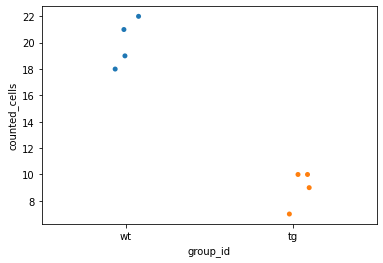

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.stripplot(data=df, x='group_id', y='counted_cells')
plt.show()

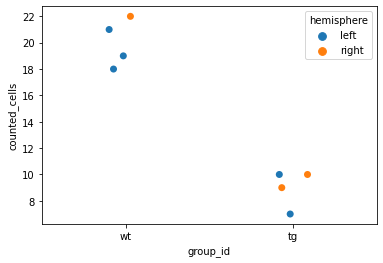

In [114]:
sns.stripplot(data=df, x='group_id', y='counted_cells', hue='hemisphere', size=7)
plt.show()

## X - classes 101

#### Regular classes:

In [1]:
class Animal:
    
    # The __init__ method is called when the object is constructed
    def __init__(self, species: str, age_in_years: int, name: str):
        # The constructor method is usually used to set certain attributes (self.whatever) based on the input
        self.species = species
        self.age = age_in_years
        self.name = name
    
    # functions that are defined in a class are called methods and always have to have 'self' as first argument
    def get_older(self):
        self.age = self.age + 1
        
        # This print function is using a formatted string, which can be quite useful to integrate variables in strings
        # You simply add an f in front of the string and can then use {} to insert your variables
        print(f'{self.name} is now {self.age} years old!')
                
        
    # methods can also do stuff that is not related to any attributes of the respectively created object
    def add_one(self, a: int) -> int:
        a = a + 1
        return a

In [2]:
# create an object of a defined class:
snoopy = Animal(species = 'dog', age_in_years = 9, name = 'Snoopy')

# access an objects attributes:
snoopy.age

9

In [7]:
# call the methods of the object:
snoopy.get_older()

b = snoopy.add_one(a = 53)
print(b)

Snoopy is now 14 years old!
54


In [8]:
# we can create multiple objects of a certain class, just like we can create as many variables as we like to:
kitty = Animal(species = 'cat', age_in_years = 5, name = 'Kitty')
tweety = Animal(species = 'bird', age_in_years = 2, name = 'Tweety')

kitty.get_older()
tweety.get_older()
snoopy.get_older()

Kitty is now 6 years old!
Tweety is now 3 years old!
Snoopy is now 15 years old!


#### Inheritance:

Classes can inherit from other classes. In general, this is quite usefull if you want to create subtypes of a certain class

In [12]:
# let´s rearrange what we had above
# NewAnimal will now serve as our class for which we create some subclasses
class NewAnimal():
    # this time we don´t want to add species here
    def __init__(self, age_in_years: int, name: str):
        self.age = age_in_years
        self.name = name
    
    def get_older(self):
        self.age = self.age + 1
        print(f'{self.name} is now {self.age} years old!')
        
# For instance a Cat subclass - which we still want to be an Animal, so it inherits stuff from the Animal class
class Cat(NewAnimal):
    # we can now add additional stuff, like for instance another attribute that definces the species
    # Since species for the Cat class will always be 'cat', we don´t need any input for that and hence no __init__ method:
    species = 'cat'
    
    # in addition, we want all animals to make their sound:
    def make_your_sound(self):
        print('Meow')
        

# Now copy paste that more or less for another subclass:
class Dog(NewAnimal):
    species = 'dog'
    
    # in addition, we want all animals to make their sound:
    def make_your_sound(self):
        print('Wuff')

In [14]:
kitty2 = Cat(age_in_years = 3, name = 'Kitty2')
snoopy2 = Dog(age_in_years = 7, name = 'Snoopy2')

# We can still call the methods that are defined in the NewAnimal class:
kitty2.get_older()
snoopy2.get_older()

Kitty2 is now 4 years old!
Snoopy2 is now 8 years old!


In [15]:
# And of course also the additional stuff that was added within the subclasses:
kitty2.species

'cat'

In [16]:
snoopy2.make_your_sound()

Wuff


#### Some more special classes - the use of AbstractBaseClasses:

In [17]:
from abc import ABC, abstractmethod

# In a very similar way, we can use inheritance from the AbstractBaseClass to create abstractmethods
# There are several advantages of doing this, one very simple is:
# It is mandatory for every class that inherits now from this class to actually implement the method
# If this is not done, your code will throw an error once it tries to create the respective object.
# So it basically forces you as developer to make sure that this function will always be implemented
# Again, there are a lot more advantages of it, but this is the most straightforward one
class AbstractAnimal(ABC):
    
    @abstractmethod
    def make_your_sound(self):
        # do something
        pass
    
class AbstractCat(AbstractAnimal):
    
    def make_your_sound(self):
        print('Meow')
        
        
class AbstractFox(AbstractAnimal):
    
    def i_dont_care(self):
        print('not important what I write here - this function will actually never be called')

In [18]:
# This object can be created, since AbstractCat does implement the make_your_sound method
abstract_kitty = AbstractCat()
abstract_kitty.make_your_sound()

Meow


In [19]:
# This however will throw an error, since the AbstractFox "does not follow the contract" and has no implementation of the method
abstract_foxy = AbstractFox()
abstract_foxy.i_dont_care()

TypeError: Can't instantiate abstract class AbstractFox with abstract methods make_your_sound

## Other random stuff:

In [20]:
a_list = [1, 2]

a_tuple = (1, 2)

a_dict = {'dog': 'hund', 
         'cat': 'katze'}

In [21]:
# You can access elements of a list and a tuple by using an index:
a_list[0]

1

In [22]:
a_tuple[0]

1

In [23]:
# But this does not work for dictionaries:
a_dict[0]

KeyError: 0

In [24]:
# Instead, you have to pass the key to get the respective value:
a_dict['dog']

'hund'

In [26]:
# Both lists and dictionaries are mutuable, meaning that you can change their elements / values:
a_list[0] = 'hund'
a_dict['dog'] = 1

print(f'First element of the list is now: {a_list[0]}')
print(f'The value stored for key "dog" is now: {a_dict["dog"]}')

First element of the list is now: hund
The value stored for key "dog" is now: 1


In [27]:
# This, however, does not apply to tuples, as they are immutuable:

a_tuple[0] = 'unicorn'

TypeError: 'tuple' object does not support item assignment

You can also create your own functions outside of classes. In this case, you don´t need to have "self" as the first attribute

In [28]:
def return_two_things(a, b):
    return a, b

In [29]:
c = return_two_things(1, 3)

# if a function returns multiple things, they are returned as a tuple
print(c)
print(type(c))

(1, 3)
<class 'tuple'>


In [30]:
# you can easily convert most basic types into each other, for instance here from a tuple to a list
c = list(c)

print(c)
print(type(c))

[1, 3]
<class 'list'>


In [31]:
# You can also right away store all returned things in seperate variables:
e, f = return_two_things(4, 5)

print(e)
print(type(e))

print(f)
print(type(f))

4
<class 'int'>
5
<class 'int'>
